# L'objectif des "compare" est d'évaluer la qualité des calages effectués. Ils comparent les dépenses ou quantités agrégées de Budget des Familles après calage, avec celles de la comptabilité nationale. Le calage est effectué sur les dépenses en carburants.

# Import de modules généraux

In [8]:
from __future__ import division

import pkg_resources
import os
import pandas as pd
from pandas import concat
import seaborn


# Import de modules spécifiques à Openfisca

In [9]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line


# Import d'une nouvelle palette de couleurs

In [10]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Import des fichiers csv donnant les montants agrégés des dépenses répertoriées dans les enquêtes BdF. Ces montants sont calculés dans compute_depenses_carburants

In [11]:
assets_directory = os.path.join(
    pkg_resources.get_distribution('openfisca_france_indirect_taxation').location
    )

products = ['transports', 'carburants', 'essence', 'diesel']
depenses_bdf = pd.DataFrame()
for element in products:
    depenses = pd.DataFrame.from_csv(os.path.join(assets_directory,
            'openfisca_france_indirect_taxation', 'assets', 'depenses',
            'depenses_{}_totales_bdf.csv').format(element), sep = ',', header = -1)
    depenses.rename(columns = {1: '{} bdf'.format(element)}, inplace = True)
    depenses.index = depenses.index.str.replace('en ', '')
    depenses = depenses.sort_index()
    depenses_bdf = concat([depenses, depenses_bdf], axis = 1)

depenses_bdf.index = depenses_bdf.index.astype(int)


# Import des fichiers csv donnant les montants agrégés des mêmes postes d'après la comptabilité nationale

In [12]:
parametres_fiscalite_file_path = os.path.join(
    assets_directory,
    'openfisca_france_indirect_taxation',
    'assets',
    'legislation',
    'Parametres fiscalite indirecte.xls'
    )
masses_cn_data_frame = pd.read_excel(parametres_fiscalite_file_path, sheetname = "consommation_CN")

masses_cn_carburants = masses_cn_data_frame[masses_cn_data_frame['Fonction'] == 'Carburants et lubrifiants']
masses_cn_carburants = masses_cn_carburants.transpose()
masses_cn_carburants.rename(columns = {76: 'carburants agregat'}, inplace = True)

masses_cn_transports = masses_cn_data_frame[masses_cn_data_frame['Fonction'] == 'Transports']
masses_cn_transports = masses_cn_transports.transpose()
masses_cn_transports.rename(columns = {69: 'transports agregat'}, inplace = True)

comparaison_bdf_agregats = concat([depenses_bdf, masses_cn_carburants, masses_cn_transports], axis = 1)
comparaison_bdf_agregats = comparaison_bdf_agregats.dropna()


# Création des graphiques pour comparer les consommations obtenues via Budget des familles vis-à-vis de la comptabilité nationale

Comparaison des dépenses agrégées en carburant, Budget des Familles par rapport à la comptabilité nationale


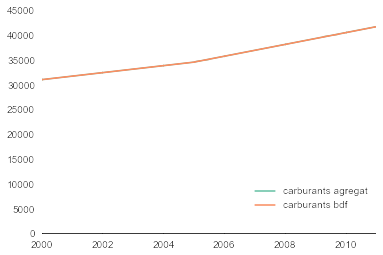

Comparaison des dépenses agrégées sur les transports, Budget des Familles par rapport à la comptabilité nationale


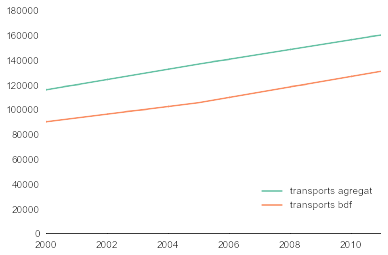

In [13]:
print('Comparaison des dépenses agrégées en carburant, Budget des Familles par rapport à la comptabilité nationale')
graph_builder_line(comparaison_bdf_agregats[['carburants agregat'] + ['carburants bdf']])
print('Comparaison des dépenses agrégées sur les transports, Budget des Familles par rapport à la comptabilité nationale')
graph_builder_line(comparaison_bdf_agregats[['transports agregat'] + ['transports bdf']])